
# Data and computations for paper 

Lars G. Johnsen
National Library of Norway

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations')
from collocations import dist_coll_urn, urn_coll, calculate_midpoint, dist
import pandas as pd

Updated file `C:\Users\yoons\Documents\GitHub\newspapers_coll_conc\collocations.py`

In [2]:
def df_jaccard(df, col1, col2, number=100, asc=False):
    s1 = df.sort_values(by=col1, ascending=asc)[:number].index
    s2 = df.sort_values(by=col2, ascending=asc)[:number].index
    
    #print(len(set(s1)&set(s2)))
    
    return jaccard(s1, s2)

In [3]:
def jaccards(s1, s2):
    return len(set(s1)&set(s2)),len(set(s1)|set(s2))

In [4]:
def jaccard(s1, s2):
    return len(set(s1)&set(s2))/len(set(s1)|set(s2))

In [5]:
def make_coll_df(small, large, tot):
    """take two collocations, small and large, and a reference tot. The reference must av a column call tot as well"""
    coll = pd.DataFrame()
    coll['small'] = small['freq']
    coll['large'] = large['freq']
    #coll['ratio'] = coll['small']/coll['large']
    coll['srel'] = coll.small/coll.small.sum()
    coll['lrel'] = coll.large/coll.large.sum()
    coll['ratio'] = coll.srel/coll.lrel
    coll['adjusted'] = coll.small**0.01*coll.ratio
    coll['nb'] = coll.small/tot.tot
    return coll

In [6]:
import pandas as pd

In [59]:
def make_dcoll_df(dists, norm, tot, exp=0):
    
    return nb.frame(
        {
        'freq':dists['freq'],
        'score':(dists.freq/dists.freq.sum())**exp*abs(norm/dists['2']), 
        'dist':dists['1'],
            'dist_' : dists['2'],
        'nb':(dists.freq/dists.freq.sum())/tot.tot
        }
    ).transpose()

### Reference corpus

The reference is the total counts from approximately 450 000 books from nb.no

In [8]:
tot = nb.frame(nb.totals(50000), 'tot')

In [9]:
nb.normalize_corpus_dataframe(tot)
tot.head()

,tot
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


# Corpus

The corpus for doing collocations is a sample of 800 books from fictional literature, dewey decimal code 813.

In [19]:
smd = 5
lmd = 10
collword = 'skrive'

In [20]:
def filenames(smd = smd, lmd = lmd, collword = collword, corpus_size= 1000, period = (1980, 2000)):
    return {
    'small_right': '_'.join([collword, str(smd), str(corpus_size), '-'.join([str(x) for x in period]), str(0), str(int(2*smd)), '.csv']),
    'large_right': '_'.join([collword, str(smd), str(corpus_size),  '-'.join([str(x) for x in period]), str(0), str(int(2*lmd)), '.csv']),
    'small_left' : '_'.join([collword, str(lmd), str(corpus_size),  '-'.join([str(x) for x in period]), str(int(2*smd)), str(0), '.csv']),
    'large_left' : '_'.join([collword, str(lmd), str(corpus_size),  '-'.join([str(x) for x in period]), str(int(2*lmd)), str(0), '.csv'])
        }

# Store the data subsequent use

In [21]:
names = filenames()
names

{'small_right': 'skrive_5_1000_1980-2000_0_10_.csv',
 'large_right': 'skrive_5_1000_1980-2000_0_20_.csv',
 'small_left': 'skrive_10_1000_1980-2000_10_0_.csv',
 'large_left': 'skrive_10_1000_1980-2000_20_0_.csv'}

In [22]:
a1 = pd.read_csv(names['small_right'], index_col=0)
a2 = pd.read_csv(names['large_right'], index_col=0)
b1 = pd.read_csv(names['small_left'], index_col=0)
b2 = pd.read_csv(names['large_left'], index_col=0)


## Create collocation dataframe 

Based on data from a1 and a2, and b1 and b2. The name for the collocations after is `coll` while `collb` is for the collocates coming before.

In [60]:
coll = make_dcoll_df(a1, lmd, tot)

In [61]:
collb = make_dcoll_df(b1, lmd, tot)

## Sorting 

Sorting on the reference is by column 'nb'

In [62]:
coll.sort_values(by='score', ascending=False)[:20][:20].fillna(0).style.background_gradient()

,freq,score,dist,dist_,nb
referat,7.000000,6.097561,1.000000,1.640000,21.736460
ned,313.000000,5.747126,1.729599,1.740000,7.169013
dikt,72.000000,5.494505,1.772565,1.820000,38.933198
postnavnet,5.000000,5.263158,1.000000,1.900000,0.000000
søknader,5.000000,5.263158,1.000000,1.900000,12.992538
kjærlighetsbrev,7.000000,5.263158,1.300000,1.900000,0.000000
hovedoppgave,8.000000,5.263158,1.388889,1.900000,34.394171
låter,14.000000,5.181347,1.653846,1.930000,77.985702
programmene,5.000000,5.076142,1.083333,1.970000,16.092123
romaner,10.000000,4.975124,1.625000,2.010000,19.599639


In [63]:
coll.sort_values(by='nb', ascending=False)[:20].fillna(0).style.background_gradient()

,freq,score,dist,dist_,nb
resept,15.000000,3.424658,2.731481,2.920000,110.160418
diktat,7.000000,1.584786,6.444444,6.310000,97.514087
stiler,10.000000,2.500000,3.833333,4.000000,96.669498
memoarer,8.000000,4.273504,1.888889,2.340000,95.072102
selvbiografi,7.000000,2.801120,3.250000,3.570000,86.367543
dagbok,32.000000,4.739336,2.004074,2.110000,83.950795
låter,14.000000,5.181347,1.653846,1.930000,77.985702
tastaturet,10.000000,1.782531,5.620370,5.610000,69.623615
skrivemaskin,7.000000,1.597444,6.388889,6.260000,68.360110
redigere,9.000000,2.659574,3.541667,3.760000,58.568307


In [49]:
coll.loc[[',','.', 'og','eller', 'i', 'på','ned']]

,freq,score,dist,nb
",",2649.0,1.858736,5.378655,0.753565
.,3757.0,1.876173,5.326698,0.933303
og,1671.0,1.855288,5.389590,0.966833
eller,342.0,2.066116,4.840187,1.823320
i,1235.0,1.739130,5.754632,0.843717
på,1080.0,2.136752,4.681068,1.648530
ned,313.0,5.747126,1.729599,7.169013


# collb

In [56]:
collb.sort_values(by='nb', ascending=False)[:20].fillna(0).style.background_gradient()

,freq,score,dist,nb
Skrive,13.000000,1.237624,-8.291667,91.917106
tekstbehandling,7.000000,2.070393,-4.722222,78.637696
lese,378.000000,3.236246,-3.082314,75.215537
Lese,5.000000,3.703704,-2.000000,72.512155
startes,10.000000,1.680672,-6.000000,71.695369
Outlook,7.000000,1.972387,-5.000000,65.828936
Styre,5.000000,1.650165,-6.200000,58.270424
skriveren,9.000000,2.724796,-3.444444,57.108591
tastaturet,8.000000,1.592357,-6.388889,55.698892
skrivere,5.000000,2.127660,-4.500000,55.062204


In [55]:
collb.sort_values(by='score', ascending=False)[:40].fillna(0).style.background_gradient()

,freq,score,dist,nb
å,4105.000000,4.830918,-2.065486,7.007123
tenkt,30.000000,4.219409,-2.266138,4.660708
begynt,29.000000,4.201681,-2.272222,9.353671
Å,87.000000,3.952569,-2.498710,6.332785
oppdrag,18.000000,3.937008,-2.370370,10.325263
Prøv,6.000000,3.875969,-2.000000,6.965343
villet,6.000000,3.875969,-2.000000,5.547231
kunnet,16.000000,3.875969,-2.380952,6.658922
slippe,10.000000,3.773585,-2.333333,3.506462
fortsatte,26.000000,3.731343,-2.571970,3.967024


# coll

# jaccard similarity

compare over a range

In [50]:
rng = range(2,40,2)

# for collb

In [51]:
jaccard_scoresb = nb.frame({'ratio': {x:df_jaccard(collb, 'nb', 'score', x) for x in rng}
                            }).transpose()

Text(0, 0.5, 'Jaccard score')

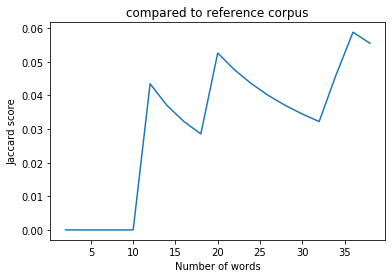

In [52]:
ax = jaccard_scoresb['ratio'].plot(title='compared to reference corpus');
ax.set_xlabel("Number of words")
ax.set_ylabel("Jaccard score")

# for coll

In [53]:
jaccard_scores = nb.frame({'ratio': {x:df_jaccard(coll, 'nb', 'score', x) for x in rng}     }).transpose()

Text(0, 0.5, 'Jaccard score')

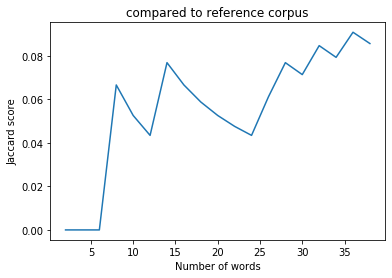

In [54]:
ax = jaccard_scores['ratio'].plot(title='compared to reference corpus');
ax.set_xlabel("Number of words")
ax.set_ylabel("Jaccard score")

In [86]:
coll.loc[coll[coll.score > 4].index].sort_values(by='score', ascending=False)

,freq,score,dist,dist_,nb
referat,7.0,6.097561,1.000000,1.64,21.736460
ned,313.0,5.747126,1.729599,1.74,7.169013
dikt,72.0,5.494505,1.772565,1.82,38.933198
kjærlighetsbrev,7.0,5.263158,1.300000,1.90,NaN
postnavnet,5.0,5.263158,1.000000,1.90,NaN
søknader,5.0,5.263158,1.000000,1.90,12.992538
hovedoppgave,8.0,5.263158,1.388889,1.90,34.394171
låter,14.0,5.181347,1.653846,1.93,77.985702
programmene,5.0,5.076142,1.083333,1.97,16.092123
romaner,10.0,4.975124,1.625000,2.01,19.599639


In [83]:
coll.loc[coll[coll.nb > 30].index].sort_values(by='nb', ascending=False)

,freq,score,dist,dist_,nb
resept,15.0,3.424658,2.731481,2.92,110.160418
diktat,7.0,1.584786,6.444444,6.31,97.514087
stiler,10.0,2.500000,3.833333,4.00,96.669498
memoarer,8.0,4.273504,1.888889,2.34,95.072102
selvbiografi,7.0,2.801120,3.250000,3.57,86.367543
dagbok,32.0,4.739336,2.004074,2.11,83.950795
låter,14.0,5.181347,1.653846,1.93,77.985702
tastaturet,10.0,1.782531,5.620370,5.61,69.623615
skrivemaskin,7.0,1.597444,6.388889,6.26,68.360110
redigere,9.0,2.659574,3.541667,3.76,58.568307


In [87]:
set(coll[coll.nb > 30].index) & set(coll[coll.score > 3.5].index)

{'biografi',
 'brev',
 'dagbok',
 'dikt',
 'essays',
 'exit',
 'forord',
 'hovedoppgave',
 'lapper',
 'låter',
 'memoarer',
 'reserverte',
 'roman',
 'rosende'}